In [138]:
#Importing neccessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [139]:
#Reading train and test data
insurance_train = pd.read_csv("D:\\bahria\\Semester 6\\AI\\assig\\self_train.csv")
insurance_test = pd.read_csv("D:\\bahria\\Semester 6\\AI\\assig\\self_test_wo_response.csv")
pd.set_option("display.max_columns", None)

In [140]:
insurance_train

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.00000,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.00000,2,0.03,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
2,3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.00000,3,0.20,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.00000,2,0.05,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,5,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,0.364887,0.325,15,1,0.00000,2,1.00,1,2,8,3,1,1,1,2,1,3,2,0.005000,1,3,2,2,NaN,0.294118,0.507042,NaN,6.0,491,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,2,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...

In [141]:
insurance_test

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,D3,26,0.128205,2,3,1,0.537313,0.690909,0.309623,0.521668,0.050,9,1,NaN,2,0.1500,1,2,4,2,1,1,1,1,1,3,1,0.000587,1,1,2,3,NaN,0.470588,0.647887,NaN,1.0,628,2,1,1,1,2,2,1,NaN,3,2,3,3,NaN,3,3,1,1,2,1,2,1,NaN,1,3,3,2,1,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,3,1,A2,26,0.102564,2,3,1,0.567164,0.618182,0.163180,0.320784,0.075,9,1,0.0,2,NaN,1,2,8,3,1,2,1,1,1,3,1,0.000667,2,1,2,3,NaN,0.549020,NaN,0.482143,5.0,161,3,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,1,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,D4,26,0.230769,2,3,1,0.179104,0.800000,0.539749,0.753765,0.031,9,1,0.0,2,0.0000,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.434783,NaN,0.394366,NaN,1.0,112,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,A2,26,0.179487,2,3,1,0.164179,0.745455,0.288703,0.428780,0.065,9,1,0.0,2,0.3500,1,2,3,3,1,1,1,1,1,3,1,0.003333,1,1,2,3,NaN,0.313725,0.281690,NaN,3.0,491,3,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

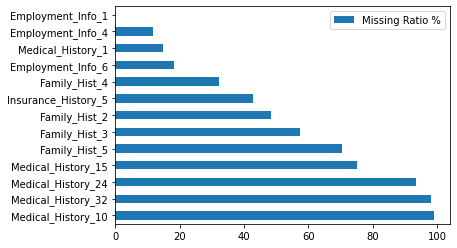

In [150]:
#visualizing null columns
def plot_nas(df: pd.DataFrame):
    if insurance_train.isnull().sum().sum() != 0:
        na_df = (insurance_train.isnull().sum() / len(insurance_train)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(insurance_train)

In [5]:
#null columns percenatages
insurance_train[insurance_train.columns[insurance_train.isnull().any()]].isnull().sum() * 100 / insurance_train.shape[0]

Employment_Info_1       0.036087
Employment_Info_4      11.612857
Employment_Info_6      18.154261
Insurance_History_5    42.893230
Family_Hist_2          48.453063
Family_Hist_3          57.484483
Family_Hist_4          32.298032
Family_Hist_5          70.439783
Medical_History_1      14.802964
Medical_History_10     99.068951
Medical_History_15     75.087812
Medical_History_24     93.586104
Medical_History_32     98.128278
dtype: float64

In [142]:
#dropping these columns
insurance_train.drop(['Id','Medical_History_10','Product_Info_7'],inplace = True, axis = 1)

In [143]:
#dropping these columns
insurance_test.drop(['Medical_History_10','Product_Info_7'],inplace = True, axis = 1)

In [144]:
#Id column from test file to concat_id variable
concat_id = insurance_test[['Id']]

In [145]:
#dropping Id column from test data
insurance_test.drop('Id',axis = 1,inplace = True)

In [146]:
insurance_train.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41551.000000,41566.00000,41566.000000,36739.000000,41566.000000,34020.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,23737.000000,41566.000000,41566.000000,41566.000000,41566.000000,21426.000000,17672.000000,28141.000000,12287.000000,35413.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.00000,41566.000000,10355.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,2666.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,778.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000,41566.000000
mean,1.025598,24.409325,0.329007,2.007145,2.674494,0.405689,0.707301,0.292610,0.469373,0.077352,8.64317,1.302026,0.006147,2.143916,0.361417,1.209811,2.007025,5.840374,2.882476,1.026705,1.410528,

In [147]:
#filling null values from mean in train data
insurance_train.fillna(insurance_train.mean(),inplace = True)

In [148]:
insurance_train

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.000000,3,0.361417,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.474152,0.598039,0.444931,0.526786,4.000000,112,2,1,1,3,2,2,1,3,2,3,3,240.000000,3,3,1,1,2,1,2,3,50.635409,1,3,3,1,3,2,3,12.703085,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,E1,26,0.076923,2,3,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.000000,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,0.001723,3,2,3,3,0.304348,0.497679,0.225352,0.484692,10.000000,3,2,2,1,3,2,2,2,3,2,3,3,124.213906,1,3,1,1,2,1,2,3,50.635409,2,2,3,1,3,2,3,12.703085,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
2,1,D4,10,0.487179,2,3,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.000000,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,0.001723,3,2,3,3,0.420290,0.497679,0.352113,0.484692,0.000000,350,2,2,1,3,2,2,2,3,2,3,3,124.213906,1,3,1,1,2,2,2,3,50.635409,1,3,3,1,3,2,3,12.703085,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,1,D2,26,0.230769,2,3,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.000000,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,0.001723,3,2,3,2,0.463768,0.497679,0.408451,0.484692,7.942592,162,2,2,1,3,2,2,2,3,2,3,3,124.213906,1,3,1,1,2,1,2,3,50.635409,2,2,3,1,3,2,3,12.703085,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,3,1,0.507463,0.836364,0.299163,0.364887,0.325,15,1,0.000000,2,1.000000,1,2,8,3,1,1,1,2,1,3,2,0.005000,1,3,2,2,0.474152,0.294118,0.507042,0.484692,6.000000,491,2,2,1,3,2,2,2,3,2,3,3,124.213906,1,3,2,1,2,2,2,3,50.635409,1,3,3,1,3,2,3,12.703085,3,1,1,2,2,1,3,3,3,0,0,0,0,0

In [149]:
#filling null values from mean in test data
insurance_test.fillna(insurance_test.mean(),inplace = True)

In [150]:
insurance_test

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,A1,26,0.076923,2,3,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.000000,2,0.00180,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.497875,0.084507,0.484502,5.000000,412,2,1,1,3,2,2,1,3,2,3,3,0.000000,1,3,1,1,2,1,2,3,50.636123,1,3,3,1,3,2,3,10.221884,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,D3,26,0.128205,2,3,0.537313,0.690909,0.309623,0.521668,0.050,9,1,0.006596,2,0.15000,1,2,4,2,1,1,1,1,1,3,1,0.000587,1,1,2,3,0.475466,0.470588,0.647887,0.484502,1.000000,628,2,1,1,1,2,2,1,3,2,3,3,122.702257,3,3,1,1,2,1,2,1,50.636123,1,3,3,2,1,2,3,10.221884,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,1,A2,26,0.102564,2,3,0.567164,0.618182,0.163180,0.320784,0.075,9,1,0.000000,2,0.36159,1,2,8,3,1,2,1,1,1,3,1,0.000667,2,1,2,3,0.475466,0.549020,0.444794,0.482143,5.000000,161,3,2,1,3,2,2,2,3,2,3,3,122.702257,1,3,1,1,2,1,2,1,50.636123,1,3,3,1,3,2,3,10.221884,3,3,1,2,2,1,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,D4,26,0.230769,2,3,0.179104,0.800000,0.539749,0.753765,0.031,9,1,0.000000,2,0.00000,1,2,6,3,1,2,1,2,1,1,3,0.001756,3,2,3,3,0.434783,0.497875,0.394366,0.484502,1.000000,112,2,2,1,3,2,2,2,3,2,3,3,122.702257,1,3,1,1,2,1,2,3,50.636123,1,3,3,1,3,2,3,10.221884,3,3,1,2,2,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,A2,26,0.179487,2,3,0.164179,0.745455,0.288703,0.428780,0.065,9,1,0.000000,2,0.35000,1,2,3,3,1,1,1,1,1,3,1,0.003333,1,1,2,3,0.475466,0.313725,0.281690,0.484502,3.000000,491,3,2,1,3,2,2,2,3,2,3,3,122.702257,1,3,1,1,2,1,2,3,50.636123,1,3,3,1,3,2,3,10.221884,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [151]:
#This line of code is encoding product info of train and test data
le = preprocessing.LabelEncoder()
insurance_train['Product_Info_2'] = le.fit_transform(insurance_train['Product_Info_2'])
insurance_test['Product_Info_2'] = le.fit_transform(insurance_test['Product_Info_2'])

In [152]:
insurance_train

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,16,10,0.076923,2,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.000000,3,0.361417,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.474152,0.598039,0.444931,0.526786,4.000000,112,2,1,1,3,2,2,1,3,2,3,3,240.000000,3,3,1,1,2,1,2,3,50.635409,1,3,3,1,3,2,3,12.703085,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,18,26,0.076923,2,3,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.000000,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,0.001723,3,2,3,3,0.304348,0.497679,0.225352,0.484692,10.000000,3,2,2,1,3,2,2,2,3,2,3,3,124.213906,1,3,1,1,2,1,2,3,50.635409,2,2,3,1,3,2,3,12.703085,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
2,1,17,10,0.487179,2,3,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.000000,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,0.001723,3,2,3,3,0.420290,0.497679,0.352113,0.484692,0.000000,350,2,2,1,3,2,2,2,3,2,3,3,124.213906,1,3,1,1,2,2,2,3,50.635409,1,3,3,1,3,2,3,12.703085,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,1,15,26,0.230769,2,3,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.000000,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,0.001723,3,2,3,2,0.463768,0.497679,0.408451,0.484692,7.942592,162,2,2,1,3,2,2,2,3,2,3,3,124.213906,1,3,1,1,2,1,2,3,50.635409,2,2,3,1,3,2,3,12.703085,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1,15,26,0.230769,3,1,0.507463,0.836364,0.299163,0.364887,0.325,15,1,0.000000,2,1.000000,1,2,8,3,1,1,1,2,1,3,2,0.005000,1,3,2,2,0.474152,0.294118,0.507042,0.484692,6.000000,491,2,2,1,3,2,2,2,3,2,3,3,124.213906,1,3,2,1,2,2,2,3,50.635409,1,3,3,1,3,2,3,12.703085,3,1,1,2,2,1,3,3,3,0,0,0,0,0

In [153]:
insurance_test

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,0,26,0.076923,2,3,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.000000,2,0.00180,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.497875,0.084507,0.484502,5.000000,412,2,1,1,3,2,2,1,3,2,3,3,0.000000,1,3,1,1,2,1,2,3,50.636123,1,3,3,1,3,2,3,10.221884,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,16,26,0.128205,2,3,0.537313,0.690909,0.309623,0.521668,0.050,9,1,0.006596,2,0.15000,1,2,4,2,1,1,1,1,1,3,1,0.000587,1,1,2,3,0.475466,0.470588,0.647887,0.484502,1.000000,628,2,1,1,1,2,2,1,3,2,3,3,122.702257,3,3,1,1,2,1,2,1,50.636123,1,3,3,2,1,2,3,10.221884,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,1,1,26,0.102564,2,3,0.567164,0.618182,0.163180,0.320784,0.075,9,1,0.000000,2,0.36159,1,2,8,3,1,2,1,1,1,3,1,0.000667,2,1,2,3,0.475466,0.549020,0.444794,0.482143,5.000000,161,3,2,1,3,2,2,2,3,2,3,3,122.702257,1,3,1,1,2,1,2,1,50.636123,1,3,3,1,3,2,3,10.221884,3,3,1,2,2,1,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,17,26,0.230769,2,3,0.179104,0.800000,0.539749,0.753765,0.031,9,1,0.000000,2,0.00000,1,2,6,3,1,2,1,2,1,1,3,0.001756,3,2,3,3,0.434783,0.497875,0.394366,0.484502,1.000000,112,2,2,1,3,2,2,2,3,2,3,3,122.702257,1,3,1,1,2,1,2,3,50.636123,1,3,3,1,3,2,3,10.221884,3,3,1,2,2,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,26,0.179487,2,3,0.164179,0.745455,0.288703,0.428780,0.065,9,1,0.000000,2,0.35000,1,2,3,3,1,1,1,1,1,3,1,0.003333,1,1,2,3,0.475466,0.313725,0.281690,0.484502,3.000000,491,3,2,1,3,2,2,2,3,2,3,3,122.702257,1,3,1,1,2,1,2,3,50.636123,1,3,3,1,3,2,3,10.221884,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [154]:
#Using variance threshold for improving acuracy
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.07)
vt.fit(insurance_train)
vt.fit(insurance_test)

VarianceThreshold(threshold=0.07)

In [155]:
#Random Classifier Tree
RF = RandomForestClassifier(min_samples_leaf = 75,n_estimators = 4800,oob_score = True )

In [156]:
#dropping Response column from training 
x = insurance_train.drop('Response',axis = 1)

In [157]:
#using Response column which we will be predicting
y = insurance_train[['Response']]

In [129]:
x

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.000000,3,0.361417,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.474152,0.598039,0.444931,0.526786,4.000000,112,2,1,1,3,2,2,1,146.118863,3,2,3,3,240.000000,3,3,1,1,2,1,2,3,50.635409,1,3,3,1,3,2,3,12.703085,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.000000,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,0.001723,3,2,3,3,0.304348,0.497679,0.225352,0.484692,10.000000,3,2,2,1,3,2,2,2,146.118863,3,2,3,3,124.213906,1,3,1,1,2,1,2,3,50.635409,2,2,3,1,3,2,3,12.703085,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.000000,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,0.001723,3,2,3,3,0.420290,0.497679,0.352113,0.484692,0.000000,350,2,2,1,3,2,2,2,146.118863,3,2,3,3,124.213906,1,3,1,1,2,2,2,3,50.635409,1,3,3,1,3,2,3,12.703085,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.000000,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,0.001723,3,2,3,2,0.463768,0.497679,0.408451,0.484692,7.942592,162,2,2,1,3,2,2,2,146.118863,3,2,3,3,124.213906,1,3,1,1,2,1,2,3,50.635409,2,2,3,1,3,2,3,12.703085,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,15,26,0.230769,3,1,1,0.507463,0.836364,0.299163,0.364887,0.325,15,1,0.000000,2,1.000000,1,2,8,3,1,1,1,2,1,3,2,0.005000,1,3,2,2,0.474152,0.294118,0.507042,0.484692,6.000000,491,2,2,1,3,2,2,2,146.118863,3,2,3,3,124.21

In [130]:
y

,Response
0,8
1,8
2,8
3,8
4,8
...,...
41561,7
41562,7
41563,8
41564,8


In [158]:
#fitting our x and y 
#we will be fitting 100% of our train data for training for best optimal accuracy and performance of our algorithm
RF.fit(x,y)

RandomForestClassifier(min_samples_leaf=75, n_estimators=4800, oob_score=True)

In [159]:
#Now predicting response variable
predict_test = RF.predict(insurance_test)

In [160]:
#predicted response values will be stored in response variable created in test file
insurance_test['Response'] = predict_test

In [161]:
insurance_test

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,0,26,0.076923,2,3,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.000000,2,0.00180,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.497875,0.084507,0.484502,5.000000,412,2,1,1,3,2,2,1,3,2,3,3,0.000000,1,3,1,1,2,1,2,3,50.636123,1,3,3,1,3,2,3,10.221884,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,1,16,26,0.128205,2,3,0.537313,0.690909,0.309623,0.521668,0.050,9,1,0.006596,2,0.15000,1,2,4,2,1,1,1,1,1,3,1,0.000587,1,1,2,3,0.475466,0.470588,0.647887,0.484502,1.000000,628,2,1,1,1,2,2,1,3,2,3,3,122.702257,3,3,1,1,2,1,2,1,50.636123,1,3,3,2,1,2,3,10.221884,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,6
2,1,1,26,0.102564,2,3,0.567164,0.618182,0.163180,0.320784,0.075,9,1,0.000000,2,0.36159,1,2,8,3,1,2,1,1,1,3,1,0.000667,2,1,2,3,0.475466,0.549020,0.444794,0.482143,5.000000,161,3,2,1,3,2,2,2,3,2,3,3,122.702257,1,3,1,1,2,1,2,1,50.636123,1,3,3,1,3,2,3,10.221884,3,3,1,2,2,1,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
3,1,17,26,0.230769,2,3,0.179104,0.800000,0.539749,0.753765,0.031,9,1,0.000000,2,0.00000,1,2,6,3,1,2,1,2,1,1,3,0.001756,3,2,3,3,0.434783,0.497875,0.394366,0.484502,1.000000,112,2,2,1,3,2,2,2,3,2,3,3,122.702257,1,3,1,1,2,1,2,3,50.636123,1,3,3,1,3,2,3,10.221884,3,3,1,2,2,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,1,1,26,0.179487,2,3,0.164179,0.745455,0.288703,0.428780,0.065,9,1,0.000000,2,0.35000,1,2,3,3,1,1,1,1,1,3,1,0.003333,1,1,2,3,0.475466,0.313725,0.281690,0.484502,3.000000,491,3,2,1,3,2,2,2,3,2,3,3,122.702257,1,3,1,1,2,1,2,3,50.636123,1,3,3,1,3,2,3,10.221884,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,

In [162]:
#now we will concat Id and Response variable as it was the requirement
rep = insurance_test['Response']
concat_id = concat_id.join(rep)

In [164]:
concat_id

,Id,Response
0,1,4
1,2,6
2,3,7
3,4,5
4,5,8
...,...,...
17810,17811,6
17811,17812,4
17812,17813,6
17813,17814,8


In [165]:
#we will convert our dataframe into csv file
concat_id.to_csv('submission-final-31', index = False)
concat_id

,Id,Response
0,1,4
1,2,6
2,3,7
3,4,5
4,5,8
...,...,...
17810,17811,6
17811,17812,4
17812,17813,6
17813,17814,8
